# XÂY DỰNG VÀ ĐÁNH GIÁ MÔ HÌNH HỌC MÁY TRONG PHÂN LỚP KHÁCH HÀNG
---
**Mô tả bài toán:** Xây dựng được một mô hình học máy cho phép dựa vào các thông tin của khách hàng giao dịch tại một ngân hàng để dự đoán xem khách hàng này có phải là khách hàng tiềm năng trong việc mở tài khoản tiết kiệm hay không?
Đây là bài toán thuộc lớp học máy có giám sát, bài toán phân lớp nhị phân (đầu ra của mô hình bao gồm 2 lớp:

*  1 - Yes (Khách hàng có tiềm năng mở tài khoản tiết kiệm tiền gửi ngân hàng)
*  0 - No (Không mở tài khoản tiết kiệm tiền gửi ngân hàng)

![alt text](https://www.vietiso.com/images/content/blog/isocms/phan_loai_khach_hang_3_jpg.jpg)

**Mô tả dữ liệu:**
tập dữ liệu sử dụng cho bài toán là tập dữ liệu khách hàng tại một ngân hàng. bao gồm: 11 162 bản ghi (tương ứng với 11 162 khách hàng). Mỗi một khách hàng bao gồm 17 thuộc tính liên quan:

1.   age: Tuổi của khách hàng. Dữ liệu số, trong khoảng [18 - 95]
2.   job: Nghề nghiệp hiện tại của khách hàng, Bao gồm: 'admin.', 'technician', 'services', 'management', 'retired','blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student'
3. Marital: Tình trạng hôn nhân của KH, bao gồm: ['married', 'single', 'divorced']
4. Education: Trình độ của KH, bao gồm: ['secondary', 'tertiary', 'primary', 'unknown']
5. Defautl:-- dữ liệu bolean: (Yes - No)
6. Balance: - dữ liệu số []
7. Housing: Khách hàng có nhà riêng chưa? Dữ liệu bolean: (Yes-No)
8. Loan: Khách hàng có khoản vay nào hay không? Dữ liệu bolean (Yes - No)
9. Contact: Hình thức liên lạc của KH, ['unknown', 'cellular', 'telephone']
10. Day: -- dữ liệu số
11. Month: Tháng
12. Duration: Thời gian liên lạc của KH, dữ liệu số
13. Campaign: -- Dữ liệu số
14. Pdays: -- Dữ liệu số
15. Previous: -- Dữ liệu số
16. Poutcome: -- Bao gồm: ['unknown', 'other', 'failure', 'success']
17. Desposit: Cho biết khách hàng có mở tiết kiệm tiền gửi không? - Đây là thuộc tính groudtruth của mô hình, bao gồm: (Yes - No)

***MỘT SỐ ĐIỂM QUAN TRỌNG VÀ THÚ VỊ CỦA EXAMPLE:***

*  Trực quan hóa các thuộc tính.
*  Chuyển đổi thuộc tính có kiểu dữ liệu Categorical về number [one-hot-vector, Labelencoder]
* Sử dụng một số thuật toán học máy cơ bản nhất: ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "Gradient Boosting Classifier","Decision Tree", "Random Forest", "Neural Net", "Naive Bayes"]
*  Vấn đề Overfitting trong khi xây dựng mô hình ML, sử dụng tập Cross - Validation để giải quyết.
* Các phương pháp để đánh giá độ chính xác của mô hình ML (Accuracy, Confusion Matrix, Precision, Recall, F1 score, AUC, ROC....) Trực quan hóa việc đánh giá mô hình (thư viện yellobrick cho phép trực quan hóa các kết quả của mô hinh ML)


---
Duc Le Analytics - https://www.facebook.com/ducle.DA

Lê Trọng Đức - 0363133232

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) ĐỌC VÀ QUAN SÁT TẬP DỮ LIỆU
---

In [ ]:
#Mount tới google drive để tải tập dữ liệu
from google.colab import drive
drive.mount('/content/drive')
path_data ="/content/drive/My Drive/Colab Notebooks/10Project/Data_Marketing/bank.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#Đọc dữ liệu trong file data
df = pd.read_csv(path_data)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 1.1) Quan sát số liệu và các đặc trưng thống kê
---

In [ ]:
#Thông tin tổng quan của tập dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
#Kiểm tra dữ liệu missing:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
#Một số đặc trưng thống kê của các thuộc tính số trong tập dữ liệu
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
#Thống kê một số đặc trưng của các thuộc tính Object
 df.describe(include=['O'])


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


KIỂM TRA DỮ LIỆU CỦA CÁC THUỘC TÍNH CÓ KIỂU TEXT

Mỗi thuộc tính sẽ kiểm tra:
* Có những giá trị khác nhau nào trong từng thuộc tính
* Thống kê số lượng ứng với mỗi giá trị đó

In [ ]:
#1) QUAN SÁT DỮ LIỆU THUỘC TÍNH JOB: công việc của khách hàng
#Liệt kê các giá trị trong cột job
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


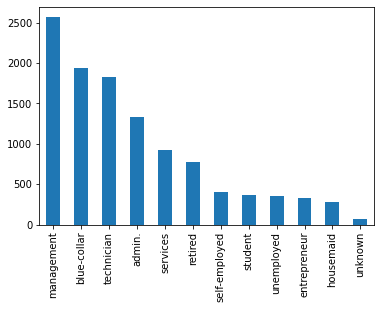

In [ ]:
print(df['job'].value_counts())
df['job'].value_counts().plot(kind='bar')

In [ ]:
#2) QUAN SÁT DỮ LIỆU THUỘC TÍNH MARITAL: Tình trạng hôn nhân của KH
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


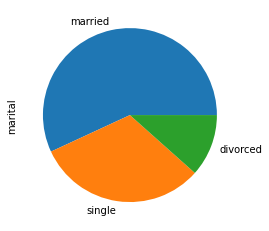

In [ ]:
print(df['marital'].value_counts())
df['marital'].value_counts().plot(kind='pie')

In [ ]:
#3) QUAN SÁT DỮ LIỆU THUỘC TÍNH EDUCATION: Trình độ học vấn của KH
df.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


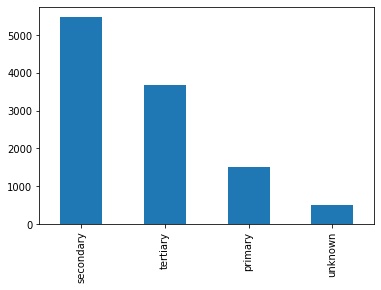

In [ ]:
print(df['education'].value_counts())
df['education'].value_counts().plot(kind='bar')

In [ ]:
# 4) QUAN SÁT DỮ LIỆU THUỘC TÍNH DEFAULT:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [ ]:
#5) QUÁN SÁT DỮ LIỆU THUỘC TÍNH HOUSING: KH có nhà ko?
df.housing.unique()

array(['yes', 'no'], dtype=object)

no     5881
yes    5281
Name: housing, dtype: int64


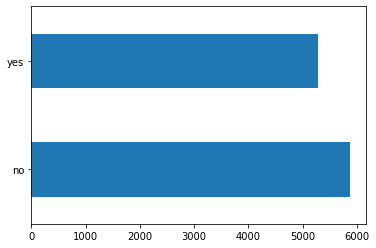

In [ ]:
print(df['housing'].value_counts())
df['housing'].value_counts().plot(kind='barh')

In [ ]:
#6) QUAN SÁT DỮ LIỆU THUỘC TÍNH LOAN: KH có khoản vay nợ không?
df.loan.unique()

array(['no', 'yes'], dtype=object)

no     9702
yes    1460
Name: loan, dtype: int64


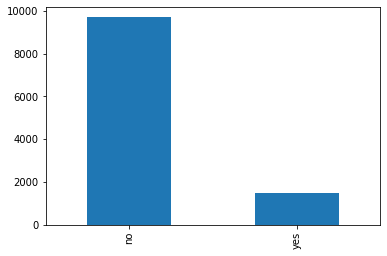

In [ ]:
print(df.loan.value_counts())
df.loan.value_counts().plot(kind='bar')

In [ ]:
#7) QUAN SÁT DỮ LIỆU THUỘC TÍNH CONTACT: hình thức liên lạc của KH
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


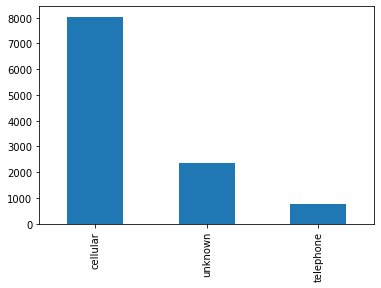

In [ ]:
print(df.contact.value_counts())
df.contact.value_counts().plot(kind='bar')

In [ ]:
#8) QUAN SÁT DỮ LIỆU THUỘC TÍNH Month
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


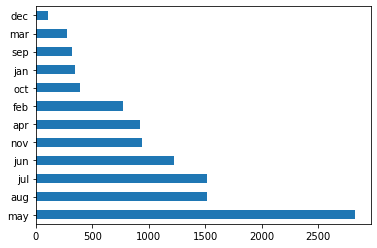

In [ ]:
print(df.month.value_counts())
df.month.value_counts().plot(kind='barh')

In [ ]:
#9) QUAN SÁT THUỘC TÍNH POUTCOME:
df.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


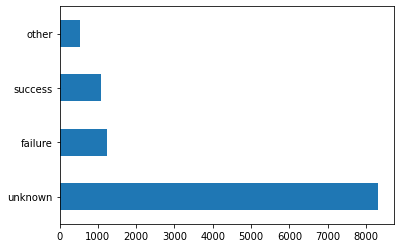

In [ ]:
print(df.poutcome.value_counts())
df.poutcome.value_counts().plot(kind='barh')

no     5873
yes    5289
Name: deposit, dtype: int64


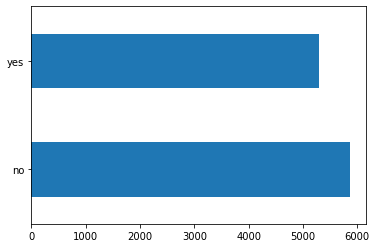

In [ ]:
#10) QUAN SÁT THUỘC TÍNH DEPOSIT: CHO BIẾT KH CÓ MỞ TÀI KHOẢN TIẾT KIỆM KO?
#ĐÂY LÀ THUỘC TÍNH OUTCOME CỦA TẬP DỮ LIỆU

print(df.deposit.value_counts())
df.deposit.value_counts().plot(kind='barh')


TẬP DỮ LIỆU SỬ DỤNG ĐỂ HUẤN LUYỆN VÀ KIỂM TRA NÀY KHÁ CÂN BẰNG GIỮA 2 LỚP.

In [ ]:
df[df.deposit=='no'].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,retired,single,primary,no,604,no,no,cellular,19,nov,187,1,-1,0,unknown,no
5290,45,admin.,divorced,secondary,no,0,yes,no,cellular,17,nov,102,1,-1,0,unknown,no
5291,48,blue-collar,married,secondary,no,238,yes,yes,cellular,2,jun,118,2,81,1,success,no
5292,34,admin.,single,secondary,no,673,yes,no,cellular,29,jan,89,1,260,2,failure,no
5293,37,entrepreneur,married,tertiary,no,7944,no,no,cellular,21,nov,102,1,-1,0,unknown,no


In [ ]:
df[df.deposit=='yes'].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


The mean balance is 1,528.53, but the Standard Deviation (std) is 3,225.41 so we can understand through this that the balance is heavily distributed across the dataset.

Duration:

- The duration is highly correlated in whether a potential client will buy a term deposit. Average Campaign Duration is 371.99, let's see if clients that were above this average were more likely to open a term deposit.So, duraton column need to be dropped; moreover,
- Duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful.

The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the client will open a term deposit since a higher duration means a higher interest commitment from the bank.



## 1.2) Quan sát tập dữ liệu thông qua Trực quan hóa
---

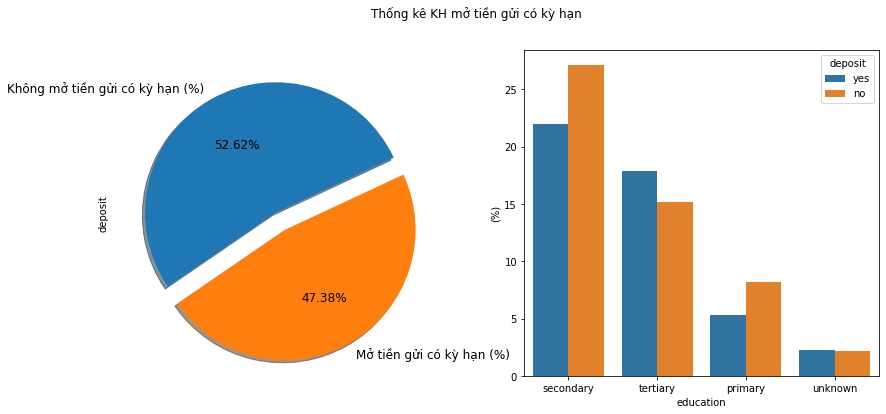

In [ ]:
f, ax = plt.subplots(1,2, figsize=(14,6))
#colors = ["#FA5858", "#64FE2E"]
labels ="Không mở tiền gửi có kỳ hạn (%)", "Mở tiền gửi có kỳ hạn (%)"
plt.suptitle('Thống kê KH mở tiền gửi có kỳ hạn', fontsize=12)

df["deposit"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', ax=ax[0], shadow=True,
                                             labels=labels, fontsize=12, startangle=25)

#ax[0].set_ylabel('% of Condition of Loans', fontsize=12)

sns.barplot(x="education", y="balance", hue="deposit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

Qua biểu đồ hình tròn ở trên có thể thấy, số bản ghi tương đối cân bằng cho cả 2 lớp. 53% (No) - 47% (Yes); ko có hiện tượng imbalanced classes

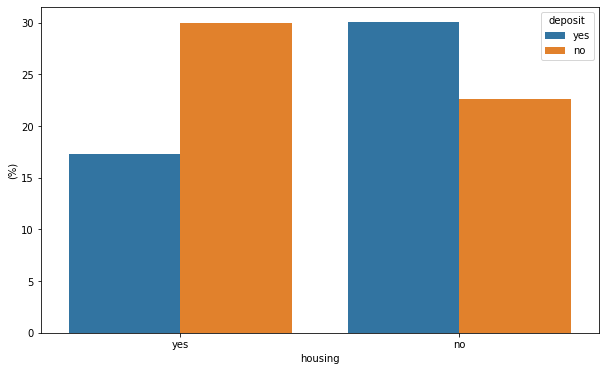

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,6))
#Đồ thị Thống kê theo KH có nhà hay không?
sns.barplot(x="housing", y="balance", hue="deposit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="(%)")
ax.set_xticklabels(df["housing"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

[Text(0, 0, 'married'), Text(0, 0, 'single'), Text(0, 0, 'divorced')]

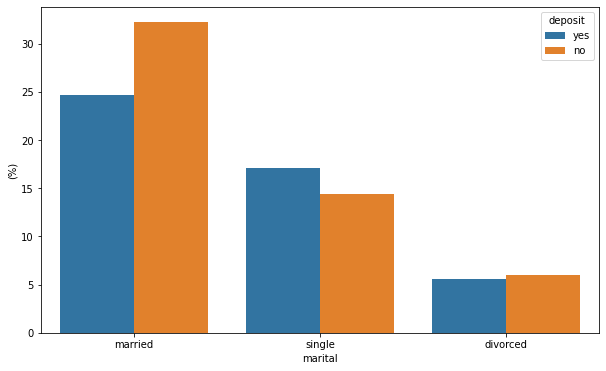

In [ ]:
f, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="marital", y="balance", hue="deposit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="(%)")
ax.set_xticklabels(df["marital"].unique(), rotation=0, rotation_mode="anchor")

[Text(0, 0, 'admin.'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'services'),
 Text(0, 0, 'management'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'student')]

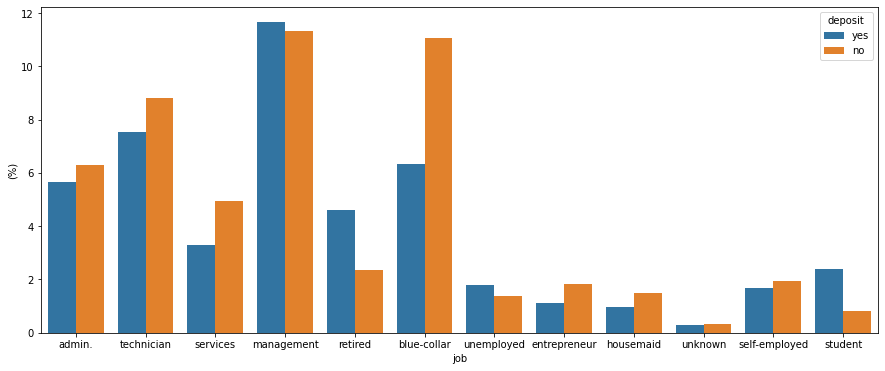

In [ ]:
f, ax = plt.subplots(figsize=(15,6))
sns.barplot(x="job", y="balance", hue="deposit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="(%)")
ax.set_xticklabels(df["job"].unique(), rotation=0, rotation_mode="anchor")

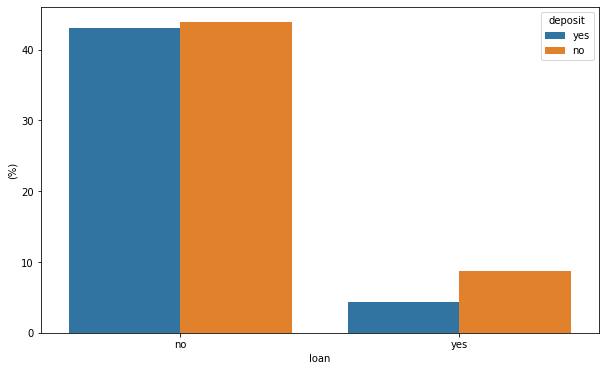

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,6))
#Đồ thị Thống kê theo KH có nhà hay không?
sns.barplot(x="loan", y="balance", hue="deposit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="(%)")
ax.set_xticklabels(df["loan"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

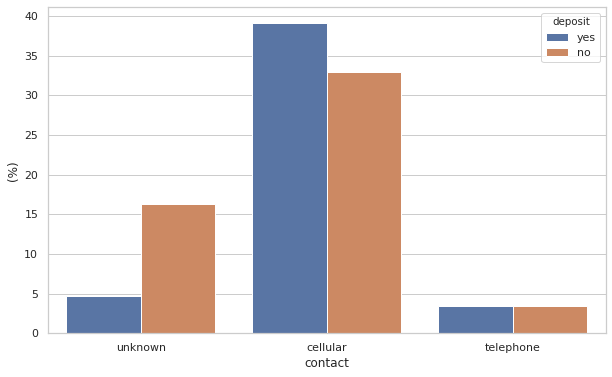

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,6))
#Đồ thị Thống kê theo KH có nhà hay không?
sns.barplot(x="contact", y="balance", hue="deposit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="(%)")
ax.set_xticklabels(df["contact"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

Xây dựng ma trận tương quan giữa các thuộc tính với thuộc tính outcome
---

In [ ]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

df_new = df.copy()

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#Thực hiện labelEncoder cho thuộc tính deposit(Yes|No - 0|1)
df_new['deposit'] = LabelEncoder().fit_transform(df_new['deposit'])

# Tạo một biến dataframe mới chỉ chứa các thuộc tính số
numeric_df = df_new.select_dtypes(exclude="object")

# Tạo một biến dataframe mới chỉ chứa các thuộc kiểu object
categorical_df = df.select_dtypes(include="object").copy()

In [ ]:
#Ma trận chỉ chứa cá giá trị số - bao gồm cả Desposit (đã đc chuyển đổi sang number)
numeric_df.head()

,age,balance,day,duration,campaign,pdays,previous,deposit
0,59,2343,5,1042,1,-1,0,1
1,56,45,5,1467,1,-1,0,1
2,41,1270,5,1389,1,-1,0,1
3,55,2476,5,579,1,-1,0,1
4,54,184,5,673,2,-1,0,1


In [ ]:
#Ma trận chứa các giá trị Object
categorical_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,duration_status
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes,above_average
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes,above_average
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes,above_average
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes,above_average
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes,above_average


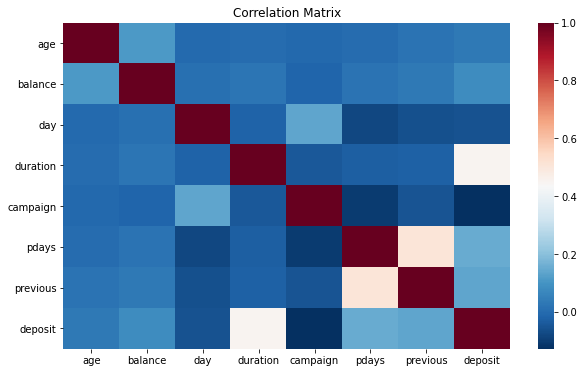

In [ ]:
#Bản đồ Heatmap thể hiện sự tương quan giữa các thuộc tính ảnh hưởng tới Deposit
corr_numeric = numeric_df.corr()
fig = plt.figure(figsize=(10,6))
sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=12)
plt.show()

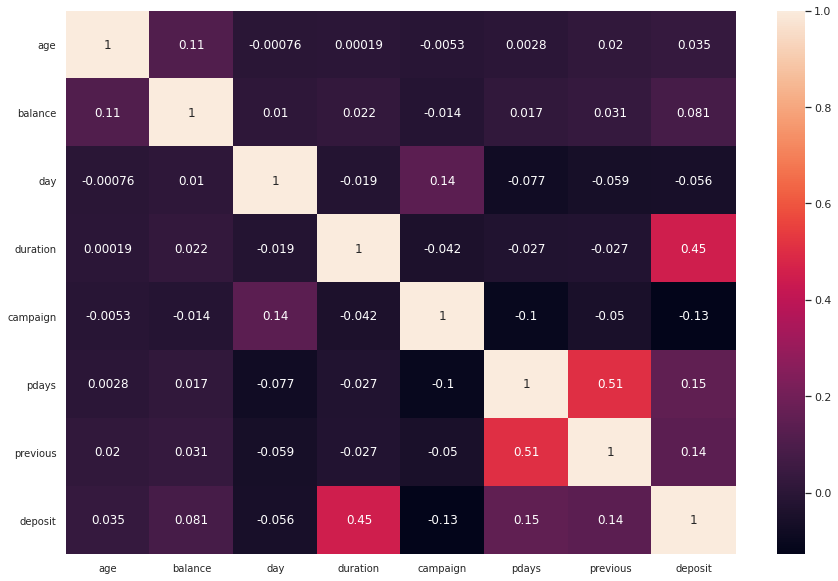

In [ ]:


corr = df_new.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(15,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,duration_status
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no,below_average
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873,7317


In [ ]:
#Chuyển đổi các thuộc tính sang số:
df_new['job'] = LabelEncoder().fit_transform(df_new['job'])
df_new['marital'] = LabelEncoder().fit_transform(df_new['marital'])
df_new['education'] = LabelEncoder().fit_transform(df_new['education'])
df_new['housing'] = LabelEncoder().fit_transform(df_new['housing'])
df_new['loan'] = LabelEncoder().fit_transform(df_new['loan'])
df_new['contact'] = LabelEncoder().fit_transform(df_new['contact'])
df_new['poutcome'] = LabelEncoder().fit_transform(df_new['poutcome'])


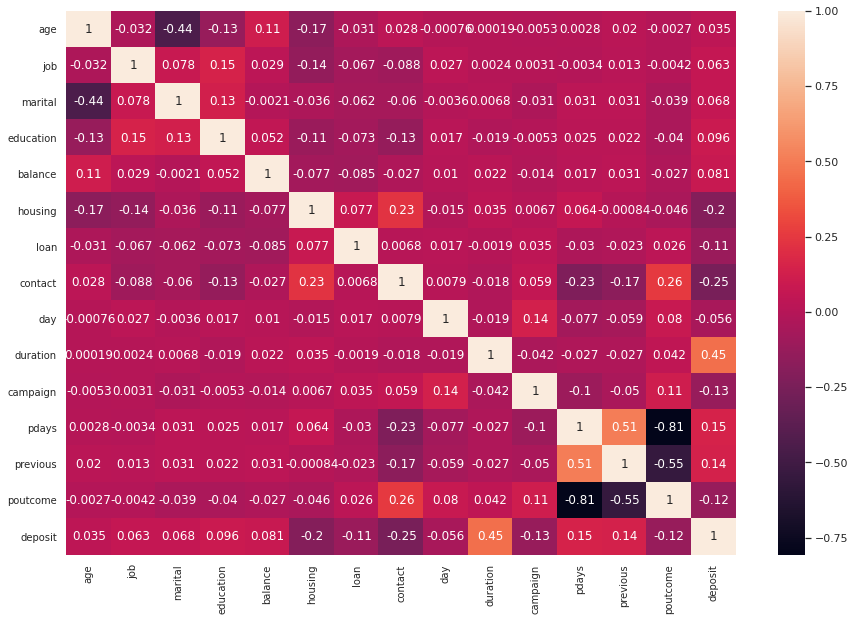

In [ ]:
corr = df_new.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(15,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## 3) Xem xét một số thuộc tính ảnh hưởng lớn tới thuộc tính outcome (Deposit)
---

#### 3.1) Thuộc tính Duration:
---
Quan sát biểu đồ heatmap ở trên chúng ta thấy hệ số tương quan của thuộc tính duration cao nhất (0.45) cho thấy thuộc tính này ảnh hưởng rất lớn tới việc KH mở tiền gửi tiết kiệm tại ngân hàng.

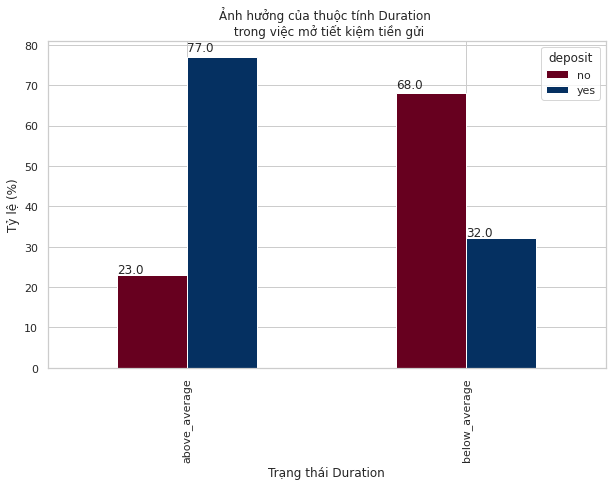

In [ ]:
# Trực quan hóa thuộc tính Duration
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')

avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"

pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("Ảnh hưởng của thuộc tính Duration \n trong việc mở tiết kiệm tiền gửi", fontsize=12)
plt.xlabel("Trạng thái Duration", fontsize=12);
plt.ylabel("Tỷ lệ (%)", fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.0, p.get_height() * 1.02))
plt.show()

In [ ]:
df_new.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,0


Qua biểu đồ thống kê ở tên cho thấy, những khách hàng có Duration lớn hơn gia trị trung bình sẽ mở tài khoản tiết kiệm cao hơn. 77% khách hàng có Duration lơn hơn trung bình (avarage) mở tài khoản, trong khi đó chỉ có 32 % khách hàng có Duration nhỏ hơn trung bình mở tài khoản. Điều này nói cho chúng ta rằng một ý tưởng tốt để xác định các cá nhân mục tiêu là người có duration trên mức trung bình.


### 3.2) Thuộc tính Housing:
---

<Figure size 720x432 with 0 Axes>

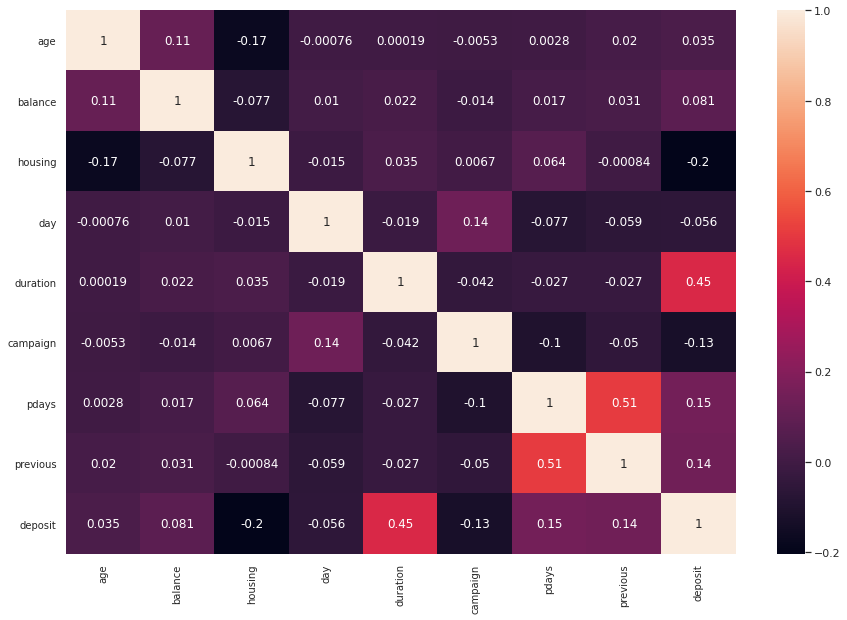

In [ ]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(10,6))
#df['deposit'] = LabelEncoder().fit_transform(df['deposit'])
df_new['housing'] = LabelEncoder().fit_transform(df_new['housing'])
#df['loan'] = LabelEncoder().fit_transform(df['loan'])


# Separate both dataframes into
numeric_df = df_new.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

#corr_numeric = numeric_df.corr()

#sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
#plt.title("Correlation Matrix", fontsize=12)
plt.show()

corr = numeric_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(15,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Nhìn vào đồ thị heatmap ta thấy hệ số tương quan giữa thuộc tính housing và thuộc tính deposit là -0.2 (<0 tương quan nghịch), cao thứ 2 sau thuộc tính duration, có thể thấy thuộc tính này cũng ảnh hưởng lớn tới kết quả.


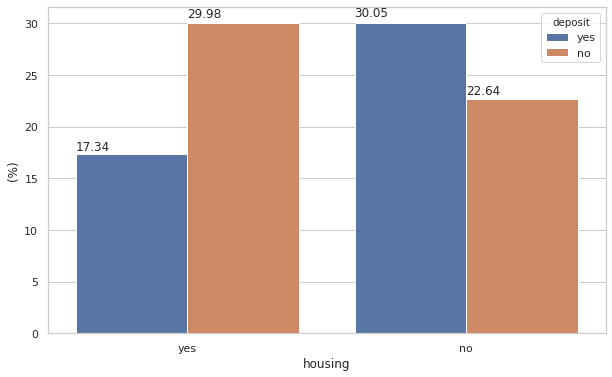

In [ ]:
#Trực quan hóa chi tiết tỷ lệ của housing trong tập dữ liệu

f, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="housing", y="balance", hue="deposit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set_ylabel('% of Housing', fontsize=12)
ax.set(ylabel="(%)")
ax.set_xticklabels(df["deposit"].unique(), rotation=0, rotation_mode="anchor")

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.0, p.get_height() * 1.02))
plt.show()

In [ ]:
#Tính tỷ lệ % KH có nhà và ko có nhà?
df["housing"].value_counts()/len(df)*100

no     52.68769
yes    47.31231
Name: housing, dtype: float64

Qua biểu đồ và thông kê ở trên ta có thể thấy, KH mà chưa có nhà ở có tỷ lệ mở tài khoản tiết kiệm cao hơn là khách hàng đã có nhà ở. Trong số 52.69% khách hàng chưa có nhà riêng, có 30.05% khách hàng mở tài khoản tiết kiệm. Bên cạnh đó trong số 47.31% khách hàng đã có nhà chỉ có 17.34% khách hàng mở tiết kiệm.

### 3.3) Thuộc tính loan
---
Personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit.

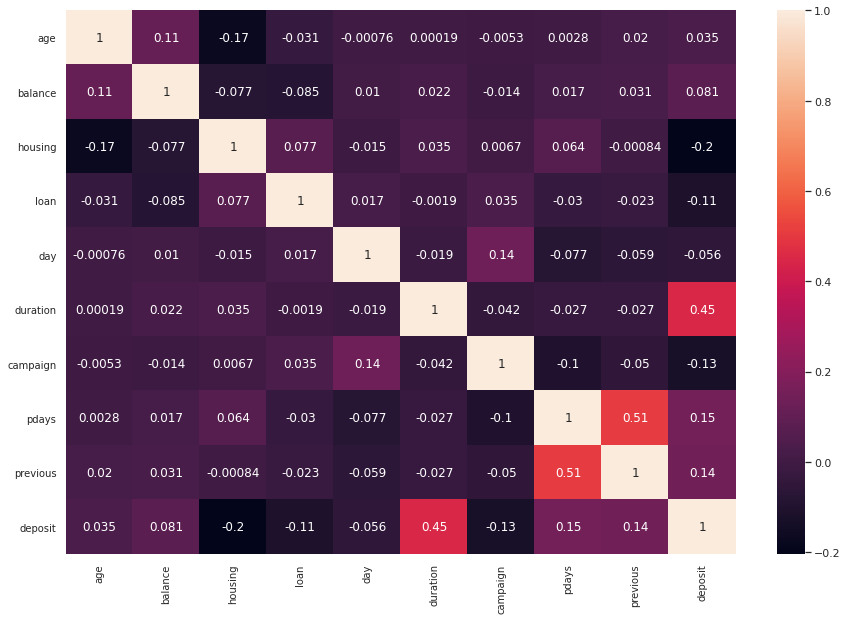

In [ ]:
df_new['loan'] = LabelEncoder().fit_transform(df_new['loan'])
numeric_df = df_new.select_dtypes(exclude="object")

corr = numeric_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(15,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
#Tỷ lệ % khách hàng có khoản vay và ko có khoản vay trong tập dữ liệu:
round(df['loan'].value_counts()/len(df)*100,2)

no     86.92
yes    13.08
Name: loan, dtype: float64

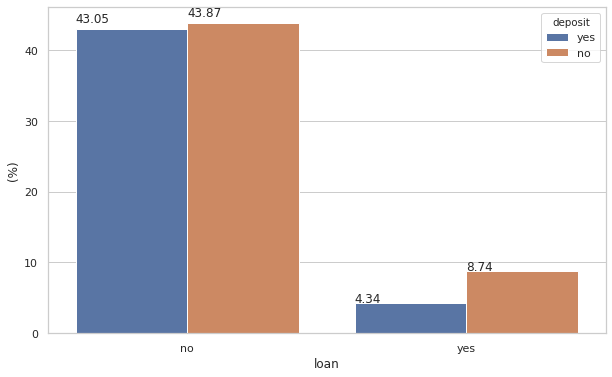

In [ ]:
#Trực quan hóa chi tiết tỷ lệ của loan trong tập dữ liệu
f, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="loan", y="balance", hue="deposit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set_ylabel('% of Loan', fontsize=12)
ax.set(ylabel="(%)")
ax.set_xticklabels(df["loan"].unique(), rotation=0, rotation_mode="anchor")

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.0, p.get_height() * 1.02))
plt.show()

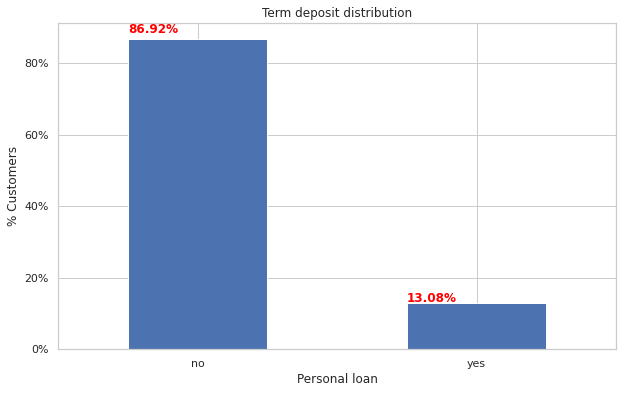

In [ ]:
from pylab import rcParams
import matplotlib.ticker as mtick # For specifying the axes tick format
rcParams['figure.figsize']=10,6

ax = (df['loan'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers with loan')
ax.set_xlabel('Personal loan')
ax.set_ylabel('% Customers')
ax.set_title('Term deposit distribution')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+'%', (p.get_x() * 1.0, p.get_height() * 1.02),color='red', weight = 'bold')


# 2) CHUẨN BỊ DỮ LIỆU
---

1) Thực hiện việc tách tập dữ liệu thành 2 tập TRAIN (85%) - TEST (15%). Việc tách thành 2 tập đảm bảo tỷ lệ các bản ghi cân bằng theo thuộc tính "Loan"

2) Thực hiện Feature engneering, trong đó:
* Các thuộc tính số ( ["age", "balance", "day", "campaign", "pdays", "previous","duration"]) thực hiện scale data và normalization
* Các thuộc tính categorical (["marital", "job", "education", "default", "housing", "loan", "contact", "month", "poutcome"]) chuyển về dạng one-hot-vector|Ordinal (labelencoder).

3) Thực hiện đưa các thuộc tính số và text (16 thuộc tính) sau khi đã thực hiện Feature Engneering ở trên thành: X-Train, X_Test; Tách thuộc tính Deposit trong tập train_data và test_data thành Y_Train, Y_Test tương ứng trước khi cho vào các mô hình.


------------------------------------------
To implement stratified sampling in our train and test data, let's follow the below procedures:
- Check the data distribution.
- The "loan" column contains 87% (86.9) of "no" (Does not have personal loans) and 13% (13.1) of "yes" (Have personal loans.)

We want to make sure that our training and test set contains the same ratio of 87% "no" and 13% "yes"."
### Stratified Sampling
In order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed.

In [ ]:
#Tạo ra một bản sao dữ liệu term_deposits của dataframe df
# chuyển vị trí cột outcome về vị trí cột đầu tiên

term_deposits = df.copy()
dep = term_deposits['deposit']
term_deposits.drop(labels=['deposit'], axis=1,inplace=True)
term_deposits.insert(0, 'deposit', dep)
term_deposits.head()

,deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,yes,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,yes,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,yes,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,yes,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,yes,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


In [ ]:
df.head()

In [ ]:
#Thực hiện tách tập dữ liệu gốc thành 2 phần: TRAIN (85%) - TEST(15)
#Việc tách này phải đảm bảo cân đối các khách hàng theo thuộc tính Loan

from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits["loan"]):
    train_data = term_deposits.loc[train_set]
    test_data = term_deposits.loc[test_set]

print('-----------------------TẬP TRAIN-----------------------')
print('kích thước:',train_data.shape)
print('Thống kê bản ghi theo thuộc tính groudtruth:\n',train_data['deposit'].value_counts())
print('Tỷ lệ tập train theo thuộc tính loan:\n', train_data["loan"].value_counts()/len(train_data))
print('-----------------------TẬP TEST-----------------------')
print('kích thước:',test_data.shape)
print('Thống kê bản ghi tập test theo thuộc tính groudtruth:\n',test_data['deposit'].value_counts())
print('Tỷ lệ tập train theo thuộc tính loan:\n', test_data["loan"].value_counts()/len(test_data))

-----------------------TẬP TRAIN-----------------------
kích thước: (9487, 17)
Thống kê bản ghi theo thuộc tính groudtruth:
 no     4976
yes    4511
Name: deposit, dtype: int64
Tỷ lệ tập train theo thuộc tính loan:
 no     0.869189
yes    0.130811
Name: loan, dtype: float64
-----------------------TẬP TEST-----------------------
kích thước: (1675, 17)
Thống kê bản ghi tập test theo thuộc tính groudtruth:
 no     897
yes    778
Name: deposit, dtype: int64
Tỷ lệ tập train theo thuộc tính loan:
 no     0.869254
yes    0.130746
Name: loan, dtype: float64


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown
    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [ ]:
#Liệt kê các thuộc tính categorical, để kiêm tra khi chuyển sang one-hot-vector
categorical_df = df.select_dtypes(include="object").copy()
categorical_df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# XỬ LÝ DỮ LIỆU CÁC THUỘC TÍNH SỐ THỰC HIỆN SCALING DATA
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
    ("std_scaler", StandardScaler()),
])

#XỬ LÝ DỮ LIỆU CÁC THUỘC TÍNH KIỂU TEXT (Categorical)
#Nếu chọn encoding = onehot-dense: chuyển đổi các dữ liệu categorical (9 cột) trong các thuộc tính thành one-hot vector.
#                            job (12 giá trị khác nhau) + marital(3) + education(4) + default(2) + housing(2) + loan(2) + contact(3) + month(12) + poutcome(4) = 44
#                            tập corpus bao gồm 44 giá trị khác nhau. Tạo thành một one-hot-vector với chiều dài 44.
#-----------------------------------------------------------------------------------------------------------------
#Nếu chọn encoding = ordinal: chuyển đổi các dữ liệu categorical (9 cột) trong các thuộc tính thành number kiểu labelencoder.
#                            + Dữ liệu trong cột job chuyển thành các số từ [0-11] tương ứng với 12 giá trị khác nhau
#                            + Dữ liệu trong cột marital chuyển thành các số từ [0-2] tương ứng với 3 giá trị khác nhau
#                            +...
#-----------------------------------------------------------------------------------------------------------------
#Nếu chọn encoding = onehot: ...???
#-----------------------------------------------------------------------------------------------------------------
categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job","marital", "education", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])


from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [ ]:
#THỬ NGHIỆM PIPELINE VỚI DỮ LIEEJJ NUMERICAL VÀ CATEGORICAL
t  = numerical_pipeline.fit_transform(train_data)
f = categorical_pipeline.fit_transform(train_data)

In [ ]:
f[0,:]

array([0., 1., 0., 0., 0., 1., 2., 5., 3.])

In [ ]:
print(f[2,:])

  (0, 2)	1.0
  (0, 14)	1.0
  (0, 16)	1.0
  (0, 19)	1.0
  (0, 21)	1.0
  (0, 24)	1.0
  (0, 25)	1.0
  (0, 33)	1.0
  (0, 43)	1.0


In [ ]:
#THỰC HIỆN VIỆC CHUYỂN ĐỔI CÁC THUỘC TÍNH ĐẦU VÀO (input) TRONG TẬP TRAIN VÀO X_train
#Các thuộc tính số đã được scaling
#Các thuộc tính categorical đã được chuyển về số
X_train = preprocess_pipeline.fit_transform(train_data)
#Quan sát bản ghi đầu tiên sau khi chuyển đổi
X_train[0,:]

array([-0.18894544, -0.49298851, -1.74096747, -0.55888832, -0.4814368 ,
       -0.370034  ,  0.73142219,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [ ]:
#THỰC HIỆN VIỆC CHUYỂN ĐỔI CÁC THUỘC TÍNH ĐẦU VÀO (input) TRONG TẬP TEST VÀO X_test
#Các thuộc tính số đã được scaling
#Các thuộc tính categorical đã được chuyển về số
X_test = preprocess_pipeline.fit_transform(test_data)
#Quan sát bản ghi đầu tiên của X_test sau khi chuyển đổi
X_test[0,:]

array([-0.51777412, -0.05174313, -0.414885  , -0.52898296,  1.17226109,
        1.17337398, -0.14066808,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

In [ ]:
#Tách lấy thuộc tính Outcome tương ứng cho train và test
#train_data ---> X_train (input) | y_train (output)
#test_data  ---> X_test (input)  | y_test (output)

y_train = train_data['deposit']
y_test = test_data['deposit']

print('y_train: ' ,y_train.shape)
print('y_test: ' ,y_test.shape)

y_train:  (9487,)
y_test:  (1675,)


In [ ]:
#y_train, y_test có kiểu dữ liệu categorical phải thực hiện chuyển đôi
#Chuyển dữ liệu Yes|No của outcome về number 1|0
encode = LabelEncoder()
print('Trước:', y_train[0:10])
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)

print('Sau:', y_train[0:10])

Trước: 9069      no
3228     yes
7860      no
2881     yes
9233      no
7456      no
6535      no
5874      no
11066     no
7365      no
Name: deposit, dtype: object
Sau: [0 1 0 1 0 0 0 0 0 0]


# 3) XÂY DỰNG CÁC MÔ HÌNH DỰ ĐOÁN (Classification)
---

### 3.1) Áp dụng một số mô hình ML cơ bản với tập dữ liệu Train
---

In [ ]:
# Time for Classification Models
import time

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Khai báo các thuật toán phân lớp sử dụng
dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=5000),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(gamma = 'auto'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [ ]:
no_classifiers = len(dict_classifiers.keys())

#Xây dựng hàm huấn luyện theo các thuật toán
#Xác định thời gian chạy khi huấn luyện của mỗi thuật toán
#Cho biết Độ chính xác của mô hình khi chạy huấn luyện
#Thời gian chạy huấn luyện của mô hình
def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [ ]:
#Thực hiện việc huấn luyện các mô hình với dữ liệu huấn luyện
df_results = batch_classify(X_train, y_train,verbose=True)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.45 s
trained Nearest Neighbors in 0.27 s
trained Linear SVM in 4.60 s
trained Gradient Boosting Classifier in 1.97 s
trained Decision Tree in 0.09 s
trained Random Forest in 0.21 s
trained Neural Net in 12.31 s
trained Naive Bayes in 0.02 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.086057
5                 Random Forest     0.997365       0.206586
1             Nearest Neighbors     0.864446       0.268831
3  Gradient Boosting Classifier     0.858543       1.970456
6                    Neural Net     0.852957      12.314644
2                    Linear SVM     0.850954       4.601926
0           Logistic Regression     0.829029       0.445684
7                   Naive Bayes     0.719827       0.017775


## 3.2) Vấn đề Overfitting trong xây dựng mô hình ML
---
Overfitting không phải là một thuật toán trong Machine Learning. Nó là một hiện tượng không mong muốn thường gặp, người xây dựng mô hình Machine Learning cần nắm được các kỹ thuật để tránh hiện tượng này.

Overfitting là hiện tượng mô hình tìm được quá khớp với dữ liệu training. Việc quá khớp này có thể dẫn đến việc dự đoán nhầm nhiễu, và chất lượng mô hình không còn tốt trên dữ liệu test nữa. Dữ liệu test được giả sử là không được biết trước, và không được sử dụng để xây dựng các mô hình Machine Learning.

Về cơ bản, overfitting xảy ra khi mô hình quá phức tạp để mô phỏng training data. Điều này đặc biệt xảy ra khi lượng dữ liệu training quá nhỏ trong khi độ phức tạp của mô hình quá cao.
![alt text](https://machinelearningcoban.com/assets/15_overfitting/linreg_val.png)

[link tham khảo thêm](https://machinelearningcoban.com/2017/03/04/overfitting/)
---


In [ ]:
#SO SÁNH ĐỘ CHÍNH XÁC CỦA MÔ HÌNH ML TRONG KHI TRAIN VÀ KHI TEST VỚI 2 MÔ HÌNH CÓ ĐỘ CHÍNH XÁC CAO NHÂT
# Model: Desicion Tree - acc = 100% khi Train
# Model: Random Forest - acc = 99.7% khi Train

print('Model: Desicion Tree')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 3)
print("Độ chính xác của mô hình Decision tree trên tập Train: ", acc_decision_tree, "%")
#--------------------------------
#Sử dụng mô hình Train chạy dữ liệu TEST và đánh giá độ chính xác
Y_pred = decision_tree.predict(X_test)
from sklearn.metrics import accuracy_score
print("Độ chính xác của mô hình Decision tree trên tập Test:", round(accuracy_score(y_test,Y_pred)*100,2))

Model: Desicion Tree
Độ chính xác của mô hình Decision tree trên tập Train:  100.0 %
Độ chính xác của mô hình Decision tree trên tập Test: 80.12


In [ ]:
print('Model: Random Forest')
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100)
random_forest.fit(X_train, y_train)
#Đánh giá độ chính xác trên tập huấn luyện:
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 3)
print("Độ chính xác của mô hình Random Forest trên tập Train: ", acc_random_forest, "%")
#---------------------------------------------------------------------------------------
#Sử dụng mô hình Train chạy dữ liệu TEST và đánh giá độ chính xác
Y_pred = random_forest.predict(X_test)
print("Độ chính xác của mô hình Random Forest trên tập Test:", round(accuracy_score(y_test,Y_pred)*100,2))

Model: Random Forest
Độ chính xác của mô hình Random Forest trên tập Train:  100.0 %
Độ chính xác của mô hình Random Forest trên tập Test: 85.19


Như ở trên ta thấy: Với mô hình Decision tree khi huấn luyện TRAIN độ chính xác đạt 100% (rất cao), tuy nhiên mô hình ấy khi sử dụng cho tập TEST độ chính xác chỉ đạt 79% (rất thấp), Tương tự với mô hình Random Forest, độ chính xác khi huấn luyện ~100%, tuy nhiên độ chính xác trên tập TEST chỉ đạt 86% ==> OVERFITTING (Hiện tượng mô hình có độ chính xác khi TRAIN cao (sai số nhỏ) nhưng khi chạy với dữ liệu TEST thì độ chính xác lại thấp (sai số cao) - Hình minh họa

## 3.3) Sử dụng  Cross-validation để giải quyết vấn đề overfitting
---
The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. If we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [ ]:
# Sử dụng  Cross-validation để giải quyết vấn đề overfitting.
#Mỗi thuật toán thực hiện 3 lần huấn luyện trên tập TRAIN với kỹ thuật Cross Validation,
#
#---------------------------------------------------------------

from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC(gamma='auto')
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=5)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=5)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=5)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=5)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=5)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'],
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [ ]:
#Hiển thị kết quả của các thuật toán với kỹ thuật Cross Validation
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.847372
6,Neural Classifier,0.845473
7,Naives Bayes,0.845473
1,SVC,0.841995
5,Rand FC,0.839360
0,Logistic Reg.,0.824498
2,KNN,0.805946
3,Dec Tree,0.786550


## 3.4) Lựa chọn thuật toán ML tốt nhất và chạy cho dữ liệu TEST
---

Theo như kết quả ta thấy Gradient Boosting là thuật toán có độ chính xác cao nhất. Huấn luyện lại model này với cv = 5, sau đó sẽ lựa chọn model này cho bài toán của chúng ta trên tập dữ liệu Test.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#grad_clf = GradientBoostingClassifier()
y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=5)
from sklearn.metrics import accuracy_score
#grad_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Gradient Boost Classifier accuracy is %2.4f" % accuracy_score(y_train, y_train_pred))

TRAIN: Gradient Boost Classifier accuracy is 0.8474


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#neural_clf = MLPClassifier(alpha=1)
y_train_pred_n = cross_val_predict(neural_clf, X_train, y_train, cv=5)
from sklearn.metrics import accuracy_score
#neural_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Neural classifier accuracy is %2.4f" % accuracy_score(y_train, y_train_pred_n))

TRAIN: Neural classifier accuracy is 0.8462


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#nav_clf = GaussianNB()
y_train_pred_nb = cross_val_predict(nav_clf, X_train, y_train, cv=5)
from sklearn.metrics import accuracy_score
#nav_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Navie Bayes accuracy is %2.4f" % accuracy_score(y_train, y_train_pred_nb))

TRAIN: Navie Bayes accuracy is 0.7161


Dự đoán trên tập TEST với mô hình có độ chính xác cao nhất:

In [ ]:
#Hàm predict cho biết kết quả dự đoán của mô hình phân lớp là class nào?
# (0 hay 1 trong trường hợp phân lớp nhị phân)
y_predicted = grad_clf.predict(X_test)
y_predicted

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
#Hàm predict_proba cho biết xác xuất dự đoán vào lớp nào là bao nhiêu, giá trị nằm trong khoảng [0,1]
#Mô hình phân lớp có bao nhiêu lớp, sẽ cho ra một mảng gồm có bấy nhiêu phần tử,
# giá trị của phần tử cho biết xác xuất thuộc lớp ấy là bao nhiêu.
y_predicted_probas =grad_clf.predict_proba(X_test)
y_predicted_probas

array([[0.1394669 , 0.8605331 ],
       [0.20749403, 0.79250597],
       [0.88952354, 0.11047646],
       ...,
       [0.94517156, 0.05482844],
       [0.16716663, 0.83283337],
       [0.31623066, 0.68376934]])

# 4) ĐÁNH GIÁ ĐỘ CHÍNH XÁC CỦA CÁC MÔ HÌNH PHÂN LỚP
---

## 4.1) Độ đo accuracy:
---
Độ đo accuracy thể hiện tỷ lệ giữa số điểm đự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.

In [ ]:
from sklearn.metrics import accuracy_score
print("TEST: Gradient Boost Classifier accuracy is %2.4f" % accuracy_score(y_test,y_predicted))

TEST: Gradient Boost Classifier accuracy is 0.8448


Sau khi sử dụng cross validation ta thấy độ chính xác của model Gradient Boost với tập TRAIN đạt 84.74 % với tập TEST đạt 84.48% (khắc phục được overfitting)

## 4.2) Confusion matrix
---
Cách tính sử dụng accuracy như ở trên chỉ cho chúng ta biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng mà không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất, và dữ liệu thuộc lớp nào thường bị phân loại nhầm vào lớp khác. Để có thể đánh giá được các giá trị này, chúng ta sử dụng một ma trận được gọi là confusion matrix.

Về cơ bản, confusion matrix thể hiện có bao nhiêu điểm dữ liệu thực sự thuộc vào một class, và được dự đoán là rơi vào một class. Để hiểu rõ hơn, hãy xem hình minh họa trong phần trực quan hóa.

In [ ]:
#Hiển thị confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[751 146]
 [114 664]]


In [ ]:
len(y_test)

1675

TRỰC QUAN HÓA Confusion Matrix:


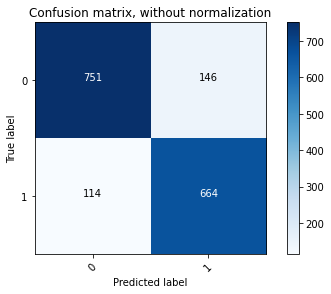

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#f, ax = plt.subplots(1,2, figsize=(14,6))
# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

Confusion matrix là một ma trận vuông với kích thước mỗi chiều bằng số lượng lớp dữ liệu. Giá trị tại hàng thứ i, cột thứ j là số lượng điểm lẽ ra thuộc vào class i nhưng lại được dự đoán là thuộc vào class j.
Như vậy, nhìn vào confusion matrix (without normalization):
* Hàng (0),cột (0): cho biết số điểm thuộc lớp 0 được phân đúng vào lớp 0 (751 điểm.
* Hàng (0), cột (1): Số điểm thuộc lớp 0 nhưng lại được phân vào lớp 1 (phân lớp sai) 146 điểm.
* Hàng (1), Cột (0): Số điểm thuộc lớp 1 nhưng lại được phân vào lớp 0 (phân lớp sai) 114 điểm
* Hàng (1), cột (1): Số điểm thuộc lớp 1 được phân đúng vào lớp 1 (664 điểm)
Các

Chúng ta có thể suy ra ngay rằng tổng các phần tử trong toàn ma trận này chính là số điểm trong tập TEST. Các phần tử trên đường chéo của ma trận là số điểm được phân loại đúng của mỗi lớp dữ liệu. Từ đây có thể suy ra accuracy chính bằng tổng các phần tử trên đường chéo chia cho tổng các phần tử của toàn ma trận.

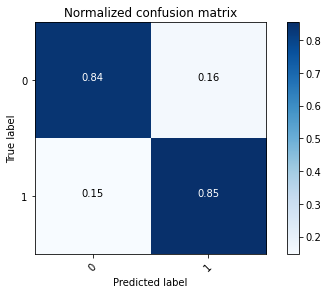

In [ ]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Để có cái nhìn rõ hơn, ta có thể dùng normalized confuion matrix, tức confusion matrix được chuẩn hoá. Để có normalized confusion matrix, ta lấy mỗi hàng của unnormalized confusion matrix sẽ được chia cho tổng các phần tử trên hàng đó. Như vậy, ta có nhận xét rằng tổng các phần tử trên một hàng của normalized confusion matrix luôn bằng 1. Điều này thường không đúng trên mỗi cột. Confusion matrix thường được minh hoạ bằng màu sắc để có cái nhìn rõ ràng hơn.
Với các bài toán với nhiều lớp dữ liệu, cách biểu diễn bằng màu này rất hữu ích. Các ô màu đậm thể hiện các giá trị cao. Một mô hình tốt sẽ cho một confusion matrix có các phần tử trên đường chéo chính có giá trị lớn, các phần tử còn lại có giá trị nhỏ.

## 4.3) Precision, Recal, F1 score
---

Thư viện yellobrick cho phép trực quan hóa các kết quả của mô hình ML

[link webstie Yellowbrick](https://www.scikit-yb.org/en/latest/)

Classification Report
The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.

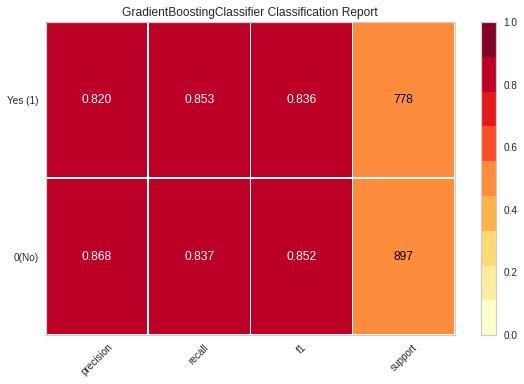

In [ ]:
from yellowbrick.classifier import ClassificationReport

# Specify the target classes
classes = ["0(No)", "Yes (1)"]

visualizer = ClassificationReport(grad_clf, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Draw/show/poof the data

The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. Visual classification reports are used to compare classification models to select models that are “redder”, e.g. have stronger classification metrics or that are more balanced.

The metrics are defined in terms of true and false positives, and true and false negatives. Positive and negative in this case are generic names for the classes of a binary classification problem. In the example above, we would consider true and false occupied and true and false unoccupied. Therefore a true positive is when the actual class is positive as is the estimated class. A false positive is when the actual class is negative but the estimated class is positive. Using this terminology the meterics are defined as follows:

#### precision
Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

#### recall
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

#### f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

#### support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

### Confusion Matrix
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.

Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.

True Negatives (Top-Left Square) correctly classify the "No" class or potenial clients that are not willing to suscribe a term deposit.
False Negatives (Top-Right Square) incorrectly classify the "No" class or potential clients that are not willing to suscribe a term depositt.
False Positives (Bottom-Left Square) incorrectly classify the "Yes" class or potential clients that are willing to suscribe a term deposit.
True Positives (Bottom-Right Square) correctly classify the "Yes" class or potenial clients that are willing to suscribe a term deposit.

In [ ]:
y_pred = grad_clf.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))

In [ ]:
accuracy_score(y_test,y_pred)

0.844776119402985

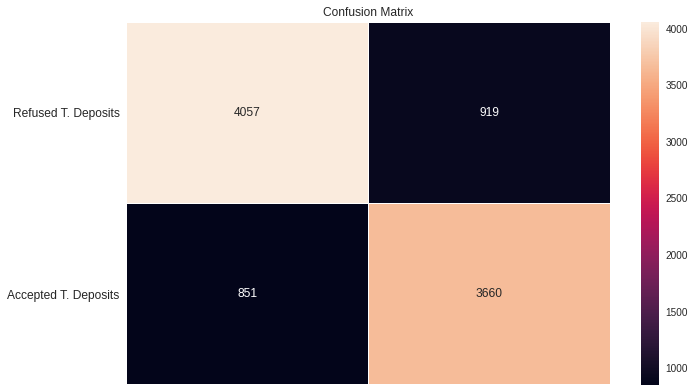

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=12)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=12, rotation=360)
plt.show()

### Precision and Recall
- Recall is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect.
- Precision means how sure is the prediction of our model that the actual label is a "Yes".

### Recall Precision Tradeoff
As the precision gets higher the recall gets lower and vice versa. For instance, if we increase the precision from 30% to 60% the model is picking the predictions that the model believes is 60% sure. If there is an instance where the model believes that is 58% likely to be a potential client that will suscribe to a term deposit then the model will classify it as a "No." However, that instance was actually a "Yes" (potential client did suscribe to a term deposit.) That is why the higher the precision the more likely the model is to miss instances that are actually a "Yes"

In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ', precision_score(y_train, y_train_pred))
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.8236173393124065
Recall Score:  0.8550210596320107


- The model is 77% sure that the potential client will suscribe to a term deposit.
- The classifier identifies 60% of potential clients that will suscribe to a term deposit.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)


0.8390254513813357

In [ ]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

array([-2.15567895])

In [ ]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=5, method="decision_function")
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
y_scores.shape

(9487,)

#### Visualization of precision, recall, f1 score, and queue rate with respect to the discrimination threshold of a binary classifier

The discrimination threshold is the probability or score at which the positive class is chosen over the negative class. Generally, this is set to 50% but the threshold can be adjusted to increase or decrease the sensitivity to false positives or to other application factors.

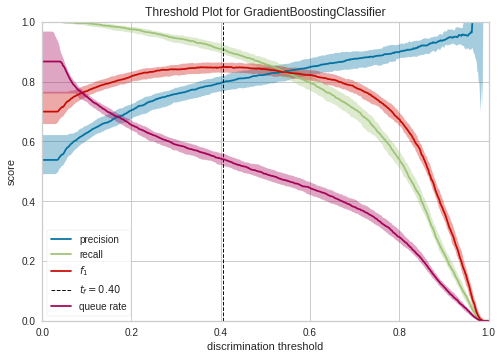

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(grad_clf)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.poof()           # Draw/show/poof the data

In the figure above, the binary classifier determines if an customerrs will go for term deposit (the positive case) or not (the negative case). If the score or probability is greater than discrimination threshold (0.4) then the positive class is selected, otherwise, the negative class is. Generally speaking, the threshold is balanced between cases and set to 0.5 or 50% probability. However, this threshold may not be the optimal threshold: often there is an inverse relationship between precision and recall with respect to a discrimination threshold. By adjusting the threshold of the classifier, it is possible to tune the F1 score (the harmonic mean of precision and recall) to the best possible fit or to adjust the classifier to behave optimally for the specific application. Classifiers are tuned by considering the following metrics:
- Precision: An increase in precision is a reduction in the number of false positives; this metric should be optimized when the cost of special treatment is high (e.g. wasted time in term deposit market campaign).
- Recall: An increase in recall decrease the likelihood that the positive class is missed; this metric should be optimized when it is vital to catch the case even at the cost of more false positives.
- F1 Score: The F1 score is the harmonic mean between precision and recall. The fbeta parameter determines the relative weight of precision and recall when computing this metric, by default set to 1 or F1. Optimizing this metric produces the best balance between precision and recall.
- Queue Rate: The “queue” is the terms deposit query. This metric describes the percentage of instances that must be reviewed. If review has a high cost for term deposit, then this must be minimized with respect to business requirements; if it doesn’t, this could be optimized to ensure the query box is clean.

In the figure above we see the visualizer tuned to look for the optimal F1 score, which is annotated as a threshold of 0.40. The model is run multiple times over multiple train/test splits in order to account for the variability of the model with respect to the metrics (shown as the fill area around the median curve).

## AUC
First we will predict the probability values from Gradient Boosting model for our dataset.

In [ ]:
predict_proba = pd.DataFrame(grad_clf.predict_proba(X_test))
predict_proba.head()

,0,1
0,0.139467,0.860533
1,0.207494,0.792506
2,0.889524,0.110476
3,0.927987,0.072013
4,0.781166,0.218834


### ROC Curve (Receiver Operating Characteristic) AUC (Area Under the Curve)
ROCAUC plot allows to visualize the tradeoff between the classifier’s sensitivity and specificity.

The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: FP are zero and TP are one.

This leads to another metric, area under the curve (AUC), which is a computation of the relationship between FP and TP. The higher the AUC, the better the model generally is. However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the TP rate while minimizing the FP rate.

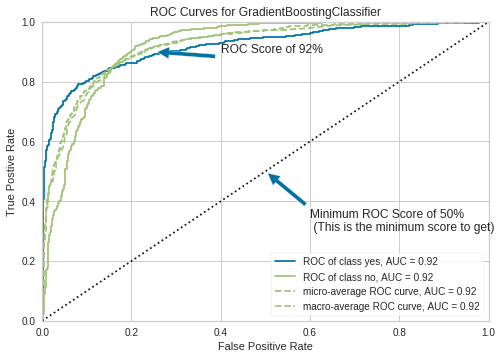

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(grad_clf, classes=["yes", "no"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)# Evaluate the model on the test data
plt.annotate('ROC Score of 92% \n', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(shrink=0.05),
            )
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(shrink=0.05),
                )
visualizer.poof()                       # Draw/show/poof the data

As we can notice, the minimum difference between the False Positive and True Positive is when our sensitivity value is at 0.6. Now we will calculate the new cut off value based on this value of sensitivity and see how the accuracy of our model increases.

In [ ]:
cutoff_prob = threshold[(np.abs(recalls - 0.6)).argmin()]
round( float( cutoff_prob ), 2 )

1.2

The ideal cutoff for having the maximum sensitivity (True Positive Rate) and 1-specificity (False Positive Rate) comes out to be 0.6


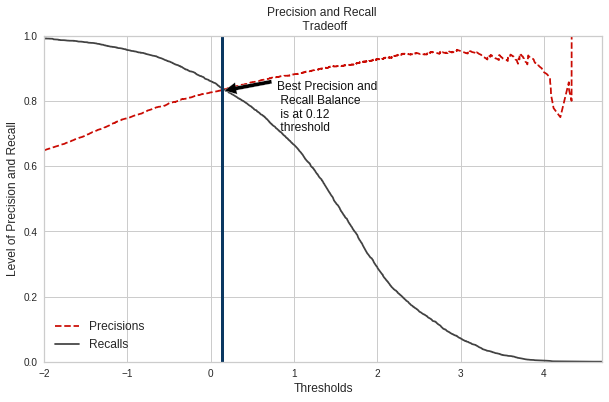

In [ ]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve
precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=12)
    plt.ylabel("Level of Precision and Recall", fontsize=12)
    plt.xlabel("Thresholds", fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.12 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12,
                color='k')

precision_recall_curve(precisions, recalls, threshold)
plt.show()

## Precision-Recall Curves
Precision-Recall curves metric used to evaluate a classifier’s quality. The precision-recall curve shows the tradeoff between precision, a measure of result relevancy, and recall, a measure of how many relevant results are returned. A large area under the curve represents both high recall and precision, the best case scenario for a classifier, showing a model that returns accurate results for the majority of classes it selects.

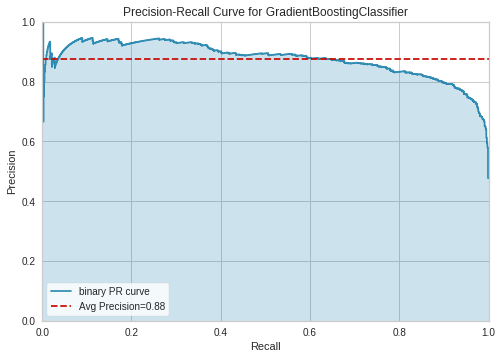

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(GradientBoostingClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

The base case for precision-recall curves is the binary classification case, and this case is also the most visually interpretable. In the figure above we can see the precision plotted on the y-axis against the recall on the x-axis. The larger the filled in area, the stronger the classifier is. The red line annotates the average precision, a summary of the entire plot computed as the weighted average of precision achieved at each threshold such that the weight is the difference in recall from the previous threshold.

### Learning Curve
Learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used two show two things:

- How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).

- If the estimator is more sensitive to error due to variance vs. error due to bias.

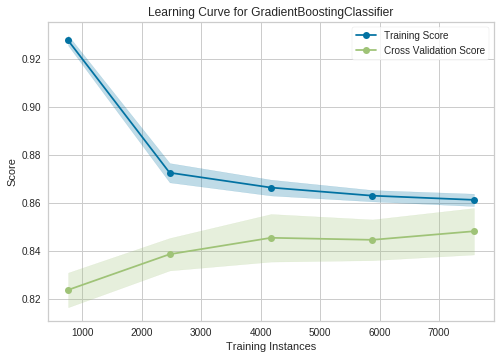

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    grad_clf, scoring='f1_weighted', cv=5)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.poof()           # Draw/show/poof the data

The training and cross-validation scores converge together as more data is added, therefore the model may not benefit from more data.

The curves are plotted with the mean scores, however variability during cross-validation is shown with the shaded areas that represent a standard deviation above and below the mean for all cross-validations. If the model suffers from error due to bias, then there will likely be more variability around the training score curve. If the model suffers from error due to variance, then there will be more variability around the cross validated score.



In [ ]:
pip install scikit-plot

Lift/cumulative gains charts aren't a good way to evaluate a model (as it cannot be used for comparison between models), and are instead a means of evaluating the results where our resources are finite. There's a cost to action each result in  marketing campaign and only action those that are on the fence. Where our model is very good, and has high classification accuracy for all results, you won't get much lift from ordering our results by confidence.

In [ ]:
import sklearn.metrics
import pandas as pd

def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):

In [ ]:
df.sort_values(by=probability_col, ascending=False, inplace=True)

subset = df[df[predicted_col] == True]

rows = []
for group in np.array_split(subset, 10):
    score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
                                               group[predicted_col].tolist(),
                                               normalize=False)

    rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

lift = pd.DataFrame(rows)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


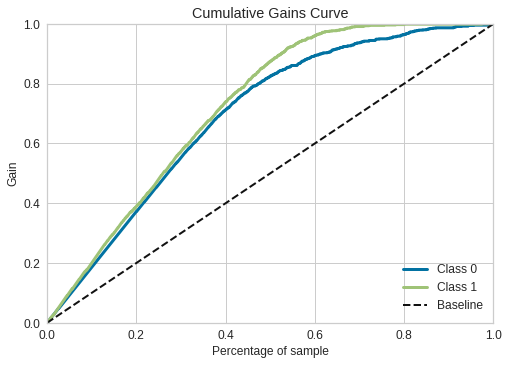

In [ ]:
from scikitplot.metrics import plot_lift_curve
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


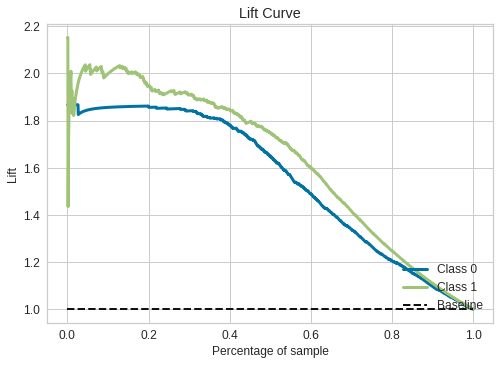

In [ ]:
skplt.metrics.plot_lift_curve(y_test, predicted_probas, title='Lift Curve', ax=None, ﬁgsize=None, title_fontsize='large', text_fontsize='medium')

In [ ]:
text = '098' #@param {type:"string"}
print(text)

098
